# MoS2

In [1]:
import  pandas as pd
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
from numpy import array, reshape, zeros, append, arange
import math
from math import log, e, pi
import numpy
from sys import argv

 #### Total Energies in eV

In [2]:
E0=-3324932.942491689 # pristine
E1=-3335811.376811718# addon S
E2=-3314050.981984572 # mono S vacancy
E3=-3303169.071443753 # di S vacancy up&down
E4=-3303169.047079117 # di S vacancy neighboring
E5=-3213689.419187400  # mono Mo vacancy
E_MoS2=-132997.116189474 # primtitive
ES8=-87031.629750345 
EMo=-222473.348568306 

#### Constants

In [3]:
pi=numpy.pi
convert=29979245800.0*2*pi #cm^-1 to Hz

# Calculation of $\mu_S$ on full temperature Range

[2000 2100 2200 2300 2400 2500]
[7.32963314e-05 1.61462427e-04 3.31039542e-04 6.37638448e-04
 1.16290588e-03 2.02132913e-03]


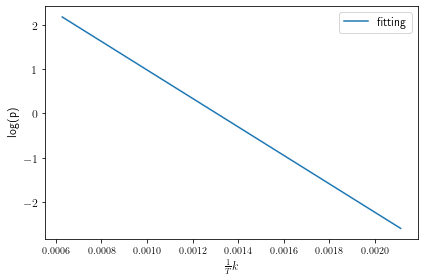

In [21]:
#x0 = np.array([473, 523, 573, 623,673])
#x=1/x0
#y0 = np.array([ 1.89e-3, 1.02e-2, 3.64e-2, 9.7e-2,2.14e-1 ])
##y=np.log(y0)
#m, b = np.polyfit(x, y, 1)
#print('slope:' ,m)
#print('y-intercept', b)
#plt.plot(x,y,'o',label='experimental data')

xr=np.array(np.arange(473,1600,10))

xw=np.array(np.arange(2000,2600,100))
print(xw)
#xw=np.array(np.arange(2800,3700,100))
xr=1/xr
xw=1/xw
yr=(4.1879-(3209*xr))
yw=(7.064-(33170*xw))
plt.plot(xr,yr, label='fitting')
pS=np.exp(yr)

pW=np.exp(yw)
print(pW)
plt.legend()
plt.ylabel('log(p)', fontsize=12)
plt.xlabel(r'$\frac{1}{T} k$', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('logp.png',dpi=400)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

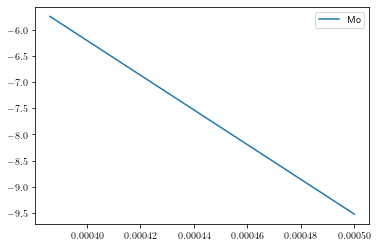

In [5]:
plt.plot(xw,yw, label='Mo')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

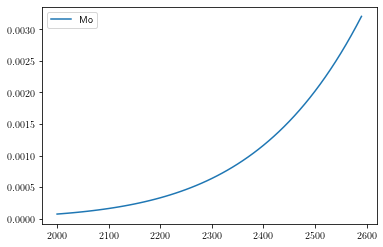

In [6]:

#print(pW)
plt.plot(1/xw,pW, label='Mo')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

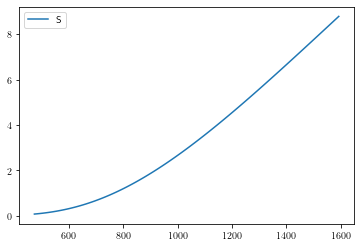

In [7]:
plt.plot(1/xr,pS, label='S')
plt.legend()
plt.show

In [8]:
d0=pd.read_csv('w0', sep='\s+',header=0)
d1=pd.read_csv('addS', sep='\s+',header=0)
d2=pd.read_csv('VS', sep='\s+',header=0)
d3=pd.read_csv('VS2', sep='\s+',header=0)
d4=pd.read_csv('VS22', sep='\s+',header=0)
d5=pd.read_csv('VMo', sep='\s+',header=0)
dS=pd.read_csv('w', sep='\s+',header=0)
dW=pd.read_csv('x', sep='\s+',header=0)

wW=dW['x']*convert 
wS8=dS['x']*convert 
w0=d0['w0']*convert
w1=d1['addS']*convert
w2=d2['VS']*convert
w3=d3['VS2']*convert
w4=d4['VS22']*convert
w5=d5['VMo']*convert #THZ to Hz

## $$\mu=   \mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

## $$  \mu_{0}=R\ln\frac{Z^{0}}{V} \frac{kT}{p_{0}} = -kT\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]- kT \ln(\frac{\pi^{\frac{1}{2}}}{\sigma}) \\ -kT \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})+kT \sum^{3N-6}_{i} \ln(1-exp(-\beta h \omega_{i})) $$

## $$ A=\ln( \frac{Z^{0}_{trans} kT}{V})=\ln [(\frac{2 \pi m }{ h^{2}})^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{p_{0}}]= \ln [(2 \pi m )^{\frac{3}{2}}\frac{(kT)^{\frac{5}{2}}}{h^{3} p_{0}}]$$

##  $$ B= \ln Z^{0}_{rot}=\ln(\frac{\pi^{\frac{1}{2}}}{\sigma})+ \ln ((\frac{8 \pi kT}{h^{2}})^{\frac{3}{2}}I_{A}^{\frac{1}{2}} I_{B}^{\frac{1}{2}} I_{C}^{\frac{1}{2}})$$

## $$ C=\ln Z^{0}_{vib}= -\sum^{3N-6}_{i} \ln(1-exp(-\frac{ \hbar \omega_{i}}{kT}))$$

## $$D=\sum_{i}\frac{\hbar \omega_{i}}{2}$$

## $$ \mu=\mu_{0}+ kT \ln\frac{p}{p_{0}}+ E_{DFT}+ \sum_{i}\frac{\hbar \omega_{i}}{2}$$

In [9]:
T=1000# 1.89e-3 atm (atm to cgs * 1013250))
p0=1013250  # atm to g/(cm s^2) 
p01=1
kk=1.380649e-16 # erg/k (cm^2.g/ks^2)
k=8.617333262145e-05 # ev/k
h=6.62607015e-27  # erg.s 
hb=6.582119569e-16 # eV.s
hbar=1.054571817e-27 # erg.s
sigma=8
m=4.258952992e-22 # 32.06*8 in amu changed to g
IA=1.314051643394595e-37 # g.cm^2
IB=1.314146807283309e-37
IC=2.42660958899724e-37

In [10]:
D=[]
E=[]

I=np.sqrt(IA)*np.sqrt(IB)*np.sqrt(IC)
A=np.log((((2*pi*m)**(3/2))*((kk*T)**(5/2)))/(p0*(h**3)))
B=np.log(np.sqrt(pi)/sigma)+ np.log((((8*pi*kk*T)/(h**2))**(3/2))*I)
temp=numpy.array([(np.log(1-math.exp(-(hbar*i)/(kk*T)))) for i in wS8])
C=np.sum(temp)
mu_0=-k*T*(A+B-C)


for i in pS:
       
        E.append(k*T*np.log(i/p01))
 
        
#
#print('E',E)
#print('mu_0', mu_0)
temp2=numpy.array([(hb*i)/(2) for i in wS8])
D=np.sum(temp2)
#print('D',D)
mu_S8=mu_0 + np.array(E) + D + ES8 
#print('mu_S8',mu_S8)

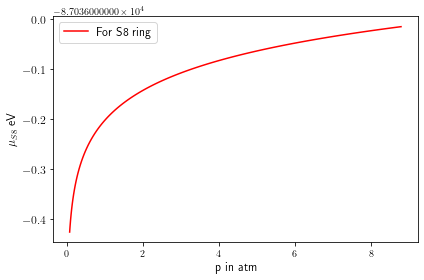

In [11]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS,mu_S8, 'red', label='For S8 ring')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{S8}$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

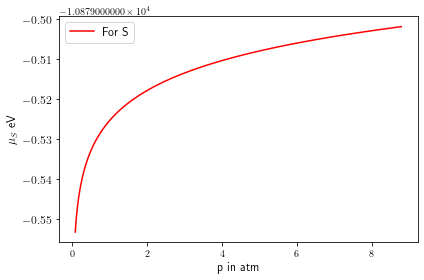

In [12]:
mu_S=np.array(mu_S8)/8
#p=arange(1.89e-3,1.89e+3,1)
plt.plot(pS,mu_S, 'red', label='For S')
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_S$ eV', fontsize=12)
plt.legend(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muS_p.png',dpi=400)

In [13]:
def free_energy(omega):
   F=[]
  
   omega = numpy.array(omega)
   #for p in arange(1.89e-3,1.89e+3,e-1):
      
   temp3=numpy.array([(hb*i/2 + k*T*np.log(1-math.exp(-(hb*i)/(k*T)))) for i in omega])
   F.append(numpy.sum(temp3))


   return F

In [14]:
def DeltaF(X,Y):
   deltaF=[]
   F1=free_energy(X)
   F2=free_energy(Y)
   zip_object = zip(F1, F2)
   for i, j in zip_object:    
       deltaF.append(i-j)
   return deltaF 

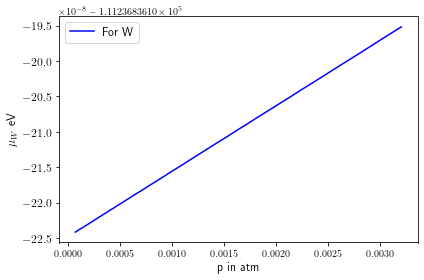

In [15]:
Fphon=free_energy(wW)
Fphon=np.array(Fphon)
#print(Fphon)
#print(EW)

V= 0.292849E+02 # volume of unitcell A^3
#print(pW*V*6.3242093e-07)
mu_W=[]
for i in pW:
       
        mu_W.append((1/2)*(EMo+np.array((i*V*6.3242093e-07))+ Fphon))
 
#pp= 7.329633135876344e-05 # at 2000 k
#PV=pW*V*6.3242093e-07 # to eV
#mu_W=(1/2)*(EW+PV+ Fphon)

plt.plot(pW,mu_W, 'blue', label='For W')
#print(mu_W)
plt.xlabel('p in atm', fontsize=12)
plt.ylabel(r'$\mu_{W}$ eV', fontsize=12)
plt.legend(fontsize=12)
#plt.ylimit(-452698.820,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('muW_T.png',dpi=400)

In [16]:
addS = numpy.array([E1-E0-a + DeltaF(w1,w0) for a in (mu_S)])
VS =  numpy.array([E2-E0+a + DeltaF(w2,w0) for a in mu_S])
VS2 =  numpy.array([E3-E0+2*a + DeltaF(w3,w0) for a in mu_S])
VS22 =  numpy.array([E4-E0+2*a + DeltaF(w4,w0) for a in  mu_S])
VW =  numpy.array([E5-E0+a + DeltaF(w5,w0) for a in mu_W])

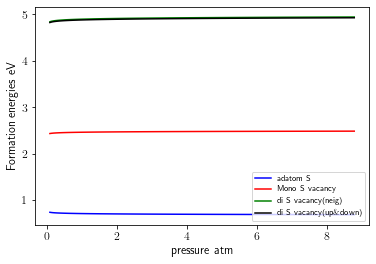

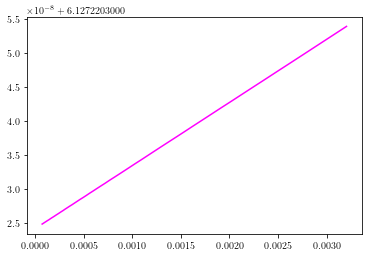

In [17]:
#p=arange(1.89e-3,1.89e+3,1)

plt.plot(pS, addS, 'b', label='adatom S')
plt.plot(pS, VS, 'r', label='Mono S vacancy')
plt.plot(pS, VS22, 'g', label='di S vacancy(neig)') 
plt.plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
#plt.plot(pW, VW, 'magenta', label='Mono Mo vacany') 
plt.xlabel('pressure atm', fontsize=12)
plt.ylabel('Formation energies eV', fontsize=12)
plt.legend(loc='lower right',fontsize=8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Ef_p.png',dpi=400)
plt.show()
plt.plot(pW, VW, 'magenta', label='Mono Mo vacany') 
plt.show()
#print(addS)

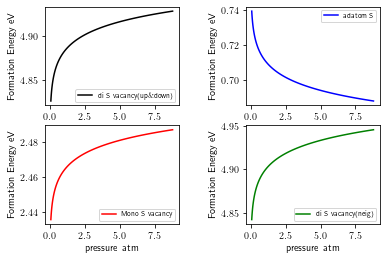

In [18]:
fig, axs = plt.subplots(2, 2)
#p=arange(1.89e-3,1.89e+3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.2)
#axs[0, 0].plot(pW, VW, 'magenta', label='Mono Mo vacany')

axs[0, 1].plot(pS, addS, 'b', label='adatom S')
axs[0, 1].legend(fontsize=7)
axs[1, 0].plot(pS, VS, 'r', label='Mono S vacancy')
axs[1, 0].legend(fontsize=7)
axs[1, 1].plot(pS, VS22, 'g', label='di S vacancy(neig)')
axs[0, 0].plot(pS, VS2, 'k', label=r'di S vacancy(up$\&$down)')
axs[1, 1].legend(fontsize=7)
axs[0, 0].legend(fontsize=7)
for ax in axs.flat:
    ax.set(xlabel='pressure atm', ylabel='Formation Energy eV')

plt.savefig('Ef_2_p.png',dpi=400) 